In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor

# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('../texas_dataset/texas_get_dummies_encoded_value_dec_3.csv')
df.head()

,age_intake_months,stay_length,intake_type_owner_surrender,intake_type_stray,intake_condition_aged,intake_condition_injured,intake_condition_neonatal,intake_condition_normal,intake_condition_nursing,intake_condition_pregnant,...,coatcolor_black_n_white,coatcolor_blue,coatcolor_brown,coatcolor_calico_or_calico_mix,coatcolor_orange,coatcolor_torbie_or_torbie_mix,coatcolor_tortie_or_tortie_mix,coatcolor_white_mix,coatpattern_solid,coatpattern_tabby
0,1,31,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,36,3,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,68,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,24,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,30,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.duplicated().sum()

8994

In [4]:
df= df.drop_duplicates(keep='first')
print(df.duplicated().sum())

0


## We are predicting if a cat will stay more than a month in the shelter (yes = 1, no =0) ☟

In [5]:
(df['stay_length']> 24).sum()

8576

In [6]:
(df['stay_length']<=24).sum()

8509

In [7]:
# this part is to predict long or short stay (0,1)
import pandas as pd

def categorize_stay(days_stayed):
    if days_stayed <= 24 :
        return 0
    else:
        return 1

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df['stay'] = df['stay_length'].apply(categorize_stay)
df.tail()

,age_intake_months,stay_length,intake_type_owner_surrender,intake_type_stray,intake_condition_aged,intake_condition_injured,intake_condition_neonatal,intake_condition_normal,intake_condition_nursing,intake_condition_pregnant,...,coatcolor_blue,coatcolor_brown,coatcolor_calico_or_calico_mix,coatcolor_orange,coatcolor_torbie_or_torbie_mix,coatcolor_tortie_or_tortie_mix,coatcolor_white_mix,coatpattern_solid,coatpattern_tabby,stay
26072,1,38,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
26073,4,7,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
26075,11,16,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
26076,0,75,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
26077,36,7,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [8]:
df.head()

,age_intake_months,stay_length,intake_type_owner_surrender,intake_type_stray,intake_condition_aged,intake_condition_injured,intake_condition_neonatal,intake_condition_normal,intake_condition_nursing,intake_condition_pregnant,...,coatcolor_blue,coatcolor_brown,coatcolor_calico_or_calico_mix,coatcolor_orange,coatcolor_torbie_or_torbie_mix,coatcolor_tortie_or_tortie_mix,coatcolor_white_mix,coatpattern_solid,coatpattern_tabby,stay
0,1,31,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,36,3,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,68,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,1,24,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,30,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [9]:
count_ones = df['stay'].value_counts().get(1)
print(f"Number of occurrences of 1: {count_ones}")

count_zeros = df['stay'].value_counts().get(0)
print(f"Number of occurrences of 0: {count_zeros}")


Number of occurrences of 1: 8576
Number of occurrences of 0: 8509


In [10]:
independent_variables = ['age_intake_months',
                    'intake_type_owner_surrender', 
                    'intake_type_stray',
                    'intake_condition_aged',
                    'intake_condition_injured',
                    'intake_condition_neonatal',
                    'intake_condition_normal',
                    'intake_condition_nursing',
                    'intake_condition_pregnant',
                    'intake_condition_sick',
                    'sex_intake_female',
                    'sex_intake_male',
                    'breed_domestic_shorthair',
                    'breed_domestic_shorthair_mix',
                    'coatcolor_black',
                    'coatcolor_black_n_white',
                    'coatcolor_blue',
                    'coatcolor_brown',
                    'coatcolor_calico_or_calico_mix',
                    'coatcolor_orange',
                    'coatcolor_torbie_or_torbie_mix',
                    'coatcolor_tortie_or_tortie_mix',
                    'coatcolor_white_mix',
                    'coatpattern_solid',
                    'coatpattern_tabby']

dependent_variable = 'stay'

In [11]:
X= df[independent_variables]
y= df[dependent_variable]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
X_train.shape, X_test.shape

((12813, 25), (4272, 25))

In [12]:
(y_test==1).sum()

2173

In [13]:
(y_test==0).sum()

2099

In [14]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_depth=10, max_leaf_nodes=5, min_samples_split=5)


In [16]:
use_model_w_dummies = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = use_model_w_dummies.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred= y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred= y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred= y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = use_model_w_dummies.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.691948
Precision Score: 0.725883
Recall Score: 0.633686
F1 Score: 0.676658
AUC Score: 0.745552


In [17]:
feature_importance = pd.Series(use_model_w_dummies.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age_intake_months                 0.503119
intake_type_owner_surrender       0.149766
intake_type_stray                 0.114912
intake_condition_normal           0.092639
intake_condition_nursing          0.084116
intake_condition_neonatal         0.028981
intake_condition_injured          0.011893
intake_condition_sick             0.008639
breed_domestic_shorthair          0.001022
coatcolor_brown                   0.000935
breed_domestic_shorthair_mix      0.000913
coatcolor_black                   0.000606
coatcolor_orange                  0.000399
sex_intake_female                 0.000316
coatcolor_white_mix               0.000304
coatcolor_tortie_or_tortie_mix    0.000302
coatpattern_tabby                 0.000278
coatpattern_solid                 0.000268
coatcolor_torbie_or_torbie_mix    0.000247
coatcolor_black_n_white           0.000134
coatcolor_calico_or_calico_mix    0.000104
intake_condition_pregnant         0.000054
sex_intake_male                   0.000053
intake_cond

In [18]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.5086610486891385

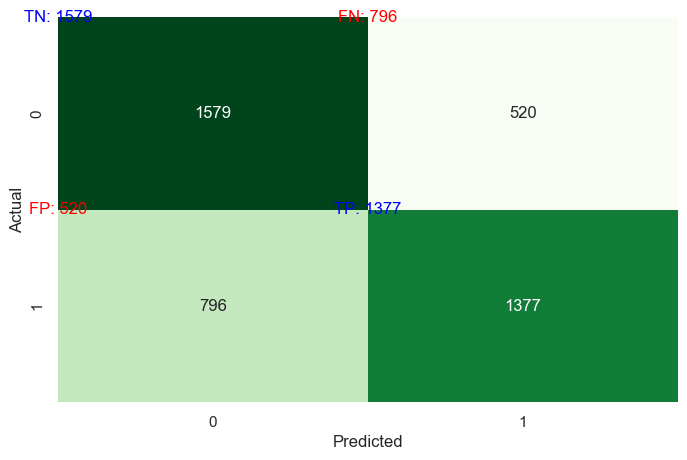

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(0, 1, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 0, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


In [ ]:
# print(y_test.tolist())

# ⬆︎⬆︎-----------  Accuracy Score: 0.691948
### Precision Score: 0.725883
### Recall Score: 0.633686
### F1 Score: 0.676658
### AUC Score: 0.745552 -------- ⬆︎⬆︎

## in order to solve the imbalance in calss we use the below code ☟

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load your dataset
df2 = pd.read_csv('../texas_dataset/texas_get_dummies_encoded_value_dec_3.csv')
df= df.drop_duplicates(keep='first')
# Define the function to categorize stay
def categorize_stay(days_stayed):
    if days_stayed <= 24:
        return 0
    else:
        return 1

# Apply the categorization
df2['stay'] = df2['stay_length'].apply(categorize_stay)

independent_variables = ['age_intake_months',
                    'intake_type_owner_surrender', 
                    'intake_type_stray',
                    'intake_condition_aged',
                    'intake_condition_injured',
                    'intake_condition_neonatal',
                    'intake_condition_normal',
                    'intake_condition_nursing',
                    'intake_condition_pregnant',
                    'intake_condition_sick',
                    'sex_intake_female',
                    'sex_intake_male',
                    'breed_domestic_shorthair',
                    'breed_domestic_shorthair_mix',
                    'coatcolor_black',
                    'coatcolor_black_n_white',
                    'coatcolor_blue',
                    'coatcolor_brown',
                    'coatcolor_calico_or_calico_mix',
                    'coatcolor_orange',
                    'coatcolor_torbie_or_torbie_mix',
                    'coatcolor_tortie_or_tortie_mix',
                    'coatcolor_white_mix',
                    'coatpattern_solid',
                    'coatpattern_tabby']

dependent_variable = 'stay'

X = df2[independent_variables]
y = df2['stay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# Use imbalanced-learn to resample the training data
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # You can adjust the sampling_strategy as needed
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# # Alternatively, you can use RandomUnderSampler for undersampling
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the hyperparameter grid for GridSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Use GridSearchCV with RandomForestClassifier
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# Fit the model on the resampled data
grid_search_cv.fit(X_resampled, y_resampled)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

# Extract the best model from GridSearchCV
balanced_model = grid_search_cv.best_estimator_

# Evaluate the model on the original test set
y_pred = balanced_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = balanced_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_features=None, max_leaf_nodes=10, n_estimators=50)
Accuracy Score: 0.728834
Precision Score: 0.716057
Recall Score: 0.730550
F1 Score: 0.723231
AUC Score: 0.790494


In [23]:
feature_importance = pd.Series(balanced_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age_intake_months                 0.928008
intake_condition_normal           0.038179
intake_type_owner_surrender       0.022243
breed_domestic_shorthair          0.004992
intake_condition_nursing          0.003236
breed_domestic_shorthair_mix      0.002512
intake_type_stray                 0.000379
coatcolor_calico_or_calico_mix    0.000148
sex_intake_female                 0.000121
sex_intake_male                   0.000098
coatcolor_white_mix               0.000084
intake_condition_injured          0.000000
coatcolor_brown                   0.000000
coatpattern_solid                 0.000000
coatcolor_tortie_or_tortie_mix    0.000000
coatcolor_torbie_or_torbie_mix    0.000000
coatcolor_orange                  0.000000
coatcolor_black                   0.000000
coatcolor_blue                    0.000000
coatcolor_black_n_white           0.000000
intake_condition_neonatal         0.000000
intake_condition_sick             0.000000
intake_condition_pregnant         0.000000
intake_cond

In [24]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.4849693251533742

In [25]:
(y_test == 1).sum()

3162

In [26]:
(y_test == 0).sum()

3358

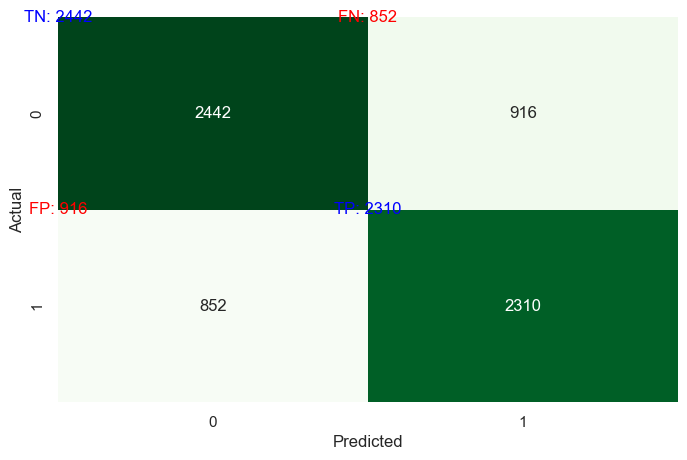

In [27]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(0, 1, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 0, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


# ⬆︎⬆︎------- Accuracy Score: 0.728834
# Precision Score: 0.716057
# Recall Score: 0.730550
# F1 Score: 0.723231
# AUC Score: 0.790494 ------- ⬆︎⬆︎

In [ ]:
.